In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

# The purpose of this notebook is to varify reduced SVM. See benchmark session of https://www.overleaf.com/project/5fd197ca13a41fea4be0760c

In [2]:
from classifiers.convex.svm import BinarySVM
from classifiers.datasets.dataloader import Toy2DLinearLoader, Sklearn_DataLoader, Toy2DXORLoader, ToyBlochSphereLoader
from classifiers.datasets.datascaler import DataMultiScaler, DataScaler
from classifiers.kernel import Kernel
from classifiers.visualization import Plot_SVM, Plot_Data, Plot_Log_From_SPSA
from sklearn.datasets import load_breast_cancer, make_circles, make_moons
import numpy as np 
from matplotlib import pyplot as plt 


# Reduced primal SVM vs Reduced primal QASVM

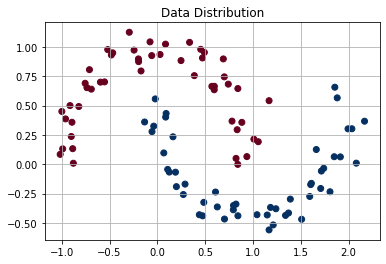

In [3]:
np.random.seed(10)
dl = Toy2DLinearLoader(w=(.1, -.1), b=0)
X, y = dl(num_data=100, noise=5)
X, y = make_moons(100, noise=0.1)
ds = DataScaler('standard', with_std=False)
Plot_Data(X, y).plot()

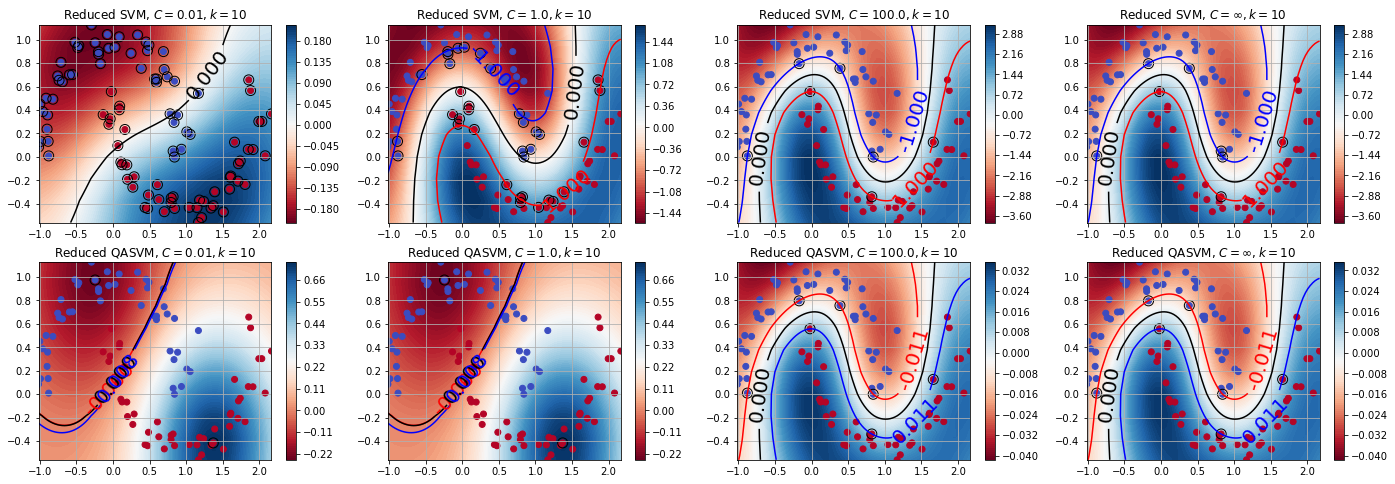

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(24, 8))
c_vals = [1e-2, 1e0, 1e2, 1e10]
for c, ax in zip(c_vals, axes[0,:]):
    svm = BinarySVM(Kernel('RBF'), C=c, k=10, mutation='REDUCED_primal_SVM')
    svm.fit(X, y)
    Plot_SVM(svm).plot_boundary(ax=ax,plot_data=True,fig=fig, color_setting={-1:'b', 0:'k', 1:'r'})
    c='\infty' if c>1e9 else c
    ax.set_title(f'Reduced SVM, $C={c}, k=10$')
for c, ax in zip(c_vals, axes[1,:]):
    svm = BinarySVM(Kernel('RBF'), C=c, k=10, mutation='REDUCED_primal_QASVM')
    svm.fit(X, y)
    Plot_SVM(svm).plot_boundary(ax=ax,plot_data=True,fig=fig, color_setting={'c1':'b', 0:'k', 'c2':'r'})
    c='\infty' if c>1e9 else c
    ax.set_title(f'Reduced QASVM, $C={c}, k=10$')
plt.savefig('./figs/reduced_primal__svm_vs_qasvm.png')